In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import io
from sklearn.cluster import KMeans


In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers (1).csv


In [ ]:
customer_data = pd.read_csv(io.BytesIO(uploaded['Mall_Customers.csv']))

In [ ]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.rename(columns={"Annual Income (k$)":"Income","Spending Score (1-100)":"Score"},inplace=True) 

In [ ]:
customer_data.set_index("CustomerID",inplace=True)

In [ ]:
customer_data.describe

<bound method NDFrame.describe of             Gender  Age  Income  Score
CustomerID                            
1             Male   19      15     39
2             Male   21      15     81
3           Female   20      16      6
4           Female   23      16     77
5           Female   31      17     40
...            ...  ...     ...    ...
196         Female   35     120     79
197         Female   45     126     28
198           Male   32     126     74
199           Male   32     137     18
200           Male   30     137     83

[200 rows x 4 columns]>

Gender Distribution in the dataset

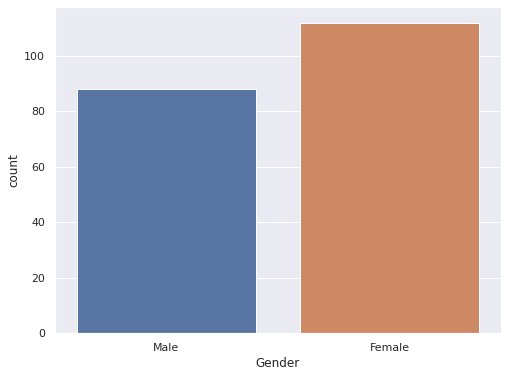

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='Gender',data=customer_data)

Age distribution

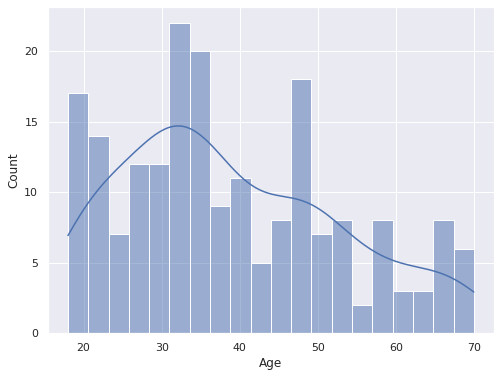

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(x='Age',kde=True,data=customer_data,bins=20)

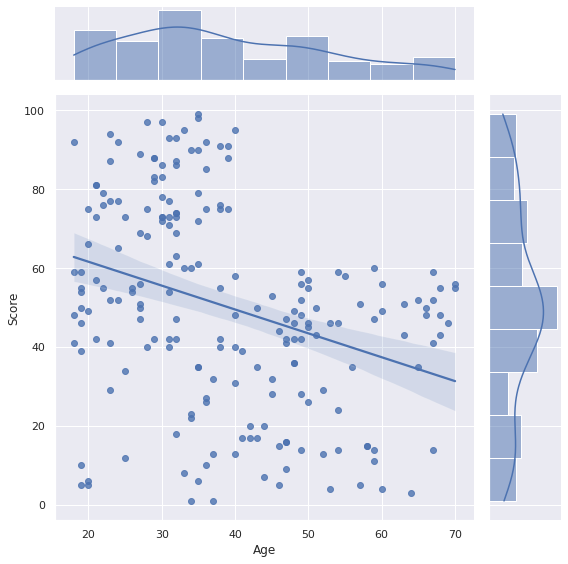

In [ ]:
sns.jointplot(x="Age",y="Score",kind="reg",data=customer_data,height=8)


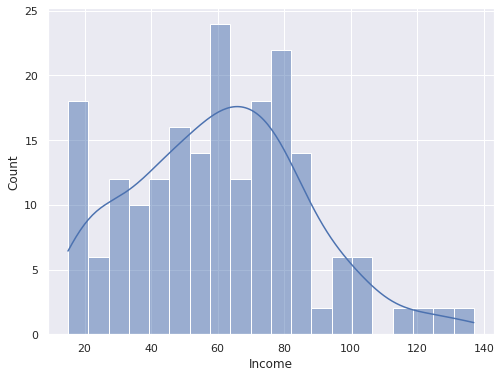

In [ ]:
plt.figure(figsize=(8,6))

sns.histplot(x='Income',kde=True,data=customer_data,bins=20) 

In [ ]:
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

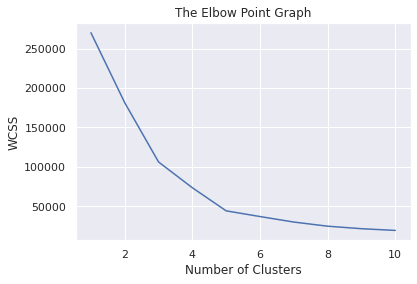

In [ ]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++',random_state=0)

#return a label for each data point based on thier clusters
Y = kmeans.fit_predict(x)

print(Y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


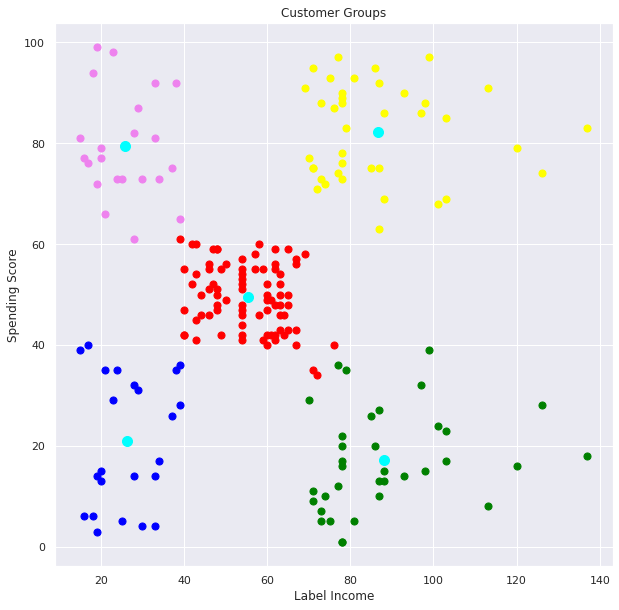

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[Y==0,0], x[Y==0,1],s=50, c='green', label='Cluster 1')
plt.scatter(x[Y==1,0], x[Y==1,1],s=50, c='red', label='Cluster 2')
plt.scatter(x[Y==2,0], x[Y==2,1],s=50, c='yellow', label='Cluster 3')
plt.scatter(x[Y==3,0], x[Y==3,1],s=50, c='violet', label='Cluster 4')
plt.scatter(x[Y==4,0], x[Y==4,1],s=50, c='blue', label='Cluster 5')

#Plotting the Centroids Values
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100,c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Label Income')
plt.ylabel('Spending Score')
plt.show()